In [1]:
from numpy import genfromtxt

bands = genfromtxt('./helpers/bands.csv', delimiter=',')

In [2]:
leaf_pixel_x = 25
leaf_pixel_y = 25
start_band = 30
end_band = 220
band_delta = end_band - start_band
band_range = bands[start_band:end_band]

In [3]:
import numpy as np
import matplotlib.pyplot as plt

rois_not_bisbul = np.empty((10, 25, 25, band_delta))
for i in range(1, 7):
    current_roises = np.load("../datasets/mangga/DATA_TUA{}_rois.npy".format(i))
    current_rois = current_roises[..., start_band:end_band]
    rois_not_bisbul = np.append(rois_not_bisbul, current_rois, axis=0)
    
rois_not_bisbul = np.delete(rois_not_bisbul, np.s_[0:10], axis=0)
rois_not_bisbul.shape

(60, 25, 25, 190)

In [4]:
rois_bisbul = np.empty((10, 25, 25, band_delta))
for i in range(4, 9):
    current_roises = np.load("../datasets/training/11032019/bisbul_{}_rois.npy".format(i))
    current_rois = current_roises[..., start_band:end_band]
    rois_bisbul = np.append(rois_bisbul, current_rois, axis=0)

rois_bisbul = np.delete(rois_bisbul, np.s_[0:10], axis=0)
rois_bisbul.shape

(60, 25, 25, 190)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

rois_teflon = np.empty((10, 25, 25, band_delta))
for i in range(1, 7):
    current_roises = np.load("../datasets/mangga/teflon{}_rois.npy".format(i))
    current_rois = current_roises[..., start_band:end_band]
    rois_teflon = np.append(rois_teflon, current_rois, axis=0)
    
rois_teflon = np.delete(rois_teflon, np.s_[0:10], axis=0)
rois_teflon.shape

(60, 25, 25, 190)

(180, 190)


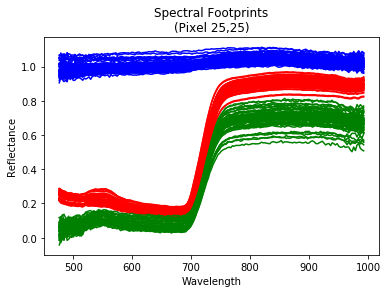

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

leaf_pixels = np.empty((1, band_delta))

for i in range (rois_bisbul.shape[0]):
    roi = rois_bisbul[i]
    intensity = []
    
    for b in range(roi.shape[2]):
        intensity.append(np.mean(roi[:, :, b]))
        
    leaf_pixel = intensity
    leaf_pixel_squeezed = np.squeeze(leaf_pixel)
    ax.plot(band_range, leaf_pixel_squeezed ,'r')
    leaf_pixels = np.append(leaf_pixels, [leaf_pixel_squeezed], axis=0)
for i in range(rois_not_bisbul.shape[0]):
    roi = rois_not_bisbul[i]
    intensity = []
    
    for b in range(roi.shape[2]):
        intensity.append(np.mean(roi[:, :, b]))
        
    leaf_pixel = intensity
    leaf_pixel_squeezed = np.squeeze(leaf_pixel)
    ax.plot(band_range, leaf_pixel_squeezed, 'g')
    leaf_pixels = np.append(leaf_pixels, [leaf_pixel_squeezed], axis=0)
    
for i in range (rois_teflon.shape[0]):
    roi = rois_teflon[i]
    intensity = []
    
    for b in range(roi.shape[2]):
        intensity.append(np.mean(roi[:, :, b]))
        
    leaf_pixel = intensity
    leaf_pixel_squeezed = np.squeeze(leaf_pixel)
    ax.plot(band_range, leaf_pixel_squeezed ,'b')
    leaf_pixels = np.append(leaf_pixels, [leaf_pixel_squeezed], axis=0)
    
leaf_pixels = np.delete(leaf_pixels, (0), axis=0)  
print(leaf_pixels.shape)

plt.title('Spectral Footprints\n(Pixel {},{})'.format(
    leaf_pixel_x, leaf_pixel_y))
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.show([-100, 100])

In [7]:
X = leaf_pixels
y = np.concatenate([np.full((60, 1), 0), np.full((60, 1), 1), np.full((60, 1), 2)], axis=0)

n_features = X.shape[1]
n_classes = y.shape[1]

y = np.squeeze(y)

In [8]:
np.any(np.isnan(X)), np.all(np.isfinite(X))

(False, False)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# One hot encoding
enc = OneHotEncoder(categories='auto')
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# train size 5/6 or ~83.3%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/6)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((180, 190), (180,), (150, 190), (30, 190), (150, 3), (30, 3))

In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = None
model = Sequential()
model.add(Dense(256, input_dim=n_features, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 150 samples, validate on 30 samples
Epoch 1/50
150/150 [==============================] - 1s 7ms/step - loss: 1.0093 - acc: 0.3800 - val_loss: nan - val_acc: 0.3333
Epoch 2/50
150/150 [==============================] - 0s 294us/step - loss: 0.7400 - acc: 0.6667 - val_loss: nan - val_acc: 0.5000
Epoch 3/50
150/150 [==============================] - 0s 298us/step - loss: 0.5519 - acc: 0.6933 - val_loss: nan - val_acc: 0.5000
Epoch 4/50
150/150 [==============================] - 0s 261us/step - loss: 0.4138 - acc: 0.7400 - val_loss: nan - val_acc: 0.9000
Epoch 5/50
150/150 [==============================] - 0s 212us/step - loss: 0.3243 - acc: 0.8867 - val_loss: nan - val_acc: 0.9000
Epoch 6/50
150/150 [==============================] - 0s 438us/step - loss: 0.2794 - acc: 0.9000 - val_loss: nan - val_acc: 0.9000
Epoch 7/50
150/150 [==============================]

Test loss: nan
Test accuracy: 0.9333333373069763


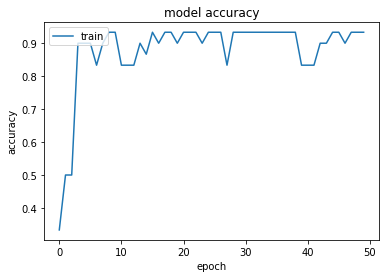

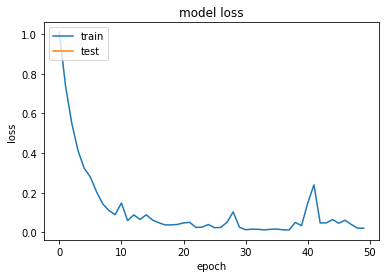

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()